In [1]:
from module_imports import *
from download_data import *
from import_data import *
from larochelle_nn import *

%matplotlib inline

stock_df, prediction_df = pd.DataFrame(), pd.DataFrame()
pred_tickers = []
source = "Q"
binarize = True
gt = 0
lt = 10.0
vol = 0
if source == "Q":
    stock_df, prediction_df, pred_tickers = get_quandl_data(binarize=True, gt=gt, lt=lt, vol=vol)
elif source == "G":
    stock_df, prediction_df = get_goog_data(binarize=True, gt=gt, lt=lt, vol=vol)
    
Y = stock_df['label'].values
Y = Y.reshape(Y.shape[0], 1)

X_df = stock_df.drop(['label','date'], axis=1)
X = X_df.values

print X.shape, Y.shape
X_df.tail()

(170974, 10) (170974, 1)


,200dravg,50dravg,Close,HL%,High,Low,OC%,Open,Volume,ticker
823,7.04130,8.5224,6.91,0.106259,7.60,6.87,-0.052126,7.29,138100,78
824,7.03935,8.4868,6.66,0.060976,6.96,6.56,-0.029155,6.86,121400,78
825,7.03830,8.4550,6.56,0.074303,6.94,6.46,-0.017964,6.68,166700,78
826,7.03650,8.4026,6.20,0.120782,6.31,5.63,-0.009585,6.26,229200,78
827,7.03310,8.3398,6.12,0.084437,6.55,6.04,-0.045242,6.41,150200,78


In [2]:
skb = SelectKBest(k=6)
skb = skb.fit(X,Y.ravel())
for i in xrange(X_df.columns.shape[0]):
    if skb.scores_[i] > 1.0:
        print X_df.columns[i], skb.scores_[i]
        
X = skb.transform(X)

200dravg 588.678558005
50dravg 1119.50872841
Close 1417.63685642
HL% 2242.26430217
High 1325.91638412
Low 1580.44774175
OC% 676.930545656
Open 1457.93915772
ticker 7.40932627412


In [3]:
balance_labeled_data = True
if balance_labeled_data == True:
    # randomly balance labeled data
    indices_Y_is_0 = np.where(Y == 0)[0]
    print indices_Y_is_0.shape[0]
    indices_Y_is_1 = np.where(Y == 1)[0]
    print indices_Y_is_1.shape[0]

    subset_indices_Y_is_0 = np.random.choice(indices_Y_is_0, indices_Y_is_1.shape[0])
    X_is_0 = X[subset_indices_Y_is_0]
    Y_is_0 = Y[subset_indices_Y_is_0]
    X_is_1 = X[indices_Y_is_1]
    Y_is_1 = Y[indices_Y_is_1]

    X = np.concatenate((X_is_0,X_is_1))
    Y = np.concatenate((Y_is_0,Y_is_1))

153297
17677


In [4]:
# randomly subset data
indices = np.random.randint(low=0,high=X.shape[0],size=(X.shape[0]/20))
X = X[indices]
Y = Y[indices]

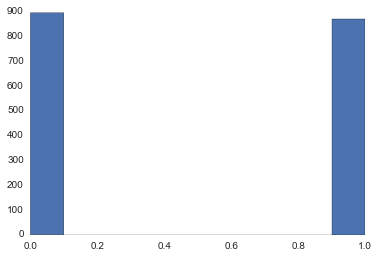

In [5]:
plt.hist(Y)
plt.show()

In [6]:
vectorize_label = True
if vectorize_label == True:
    new_y = []
    positives = []
    for i in xrange(Y.shape[0]):
        if Y[i] == 0:
            new_y.append(np.array([[1],[0]]))
        elif Y[i] == 1:
            new_y.append(np.array([[0],[1]]))
    Y = np.array(new_y)

In [7]:
X_train, X_vt, y_train, y_vt = train_test_split(X, Y, test_size=0.30, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_vt, y_vt, test_size=0.50, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [9]:
#for x,y in zip(X_train, y_train):
#    print x.reshape(x.shape[0],1)
#    print y.reshape(y.shape[0],1)
#    break

---

In [11]:
hs = [1, 2, 3, 4, 5, 10, 15]

epochs = 100
Lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0]
Regs = ['L2', 'L1']
alphas = [0.0001, 0.001, 0.01, 0.1]

# GRID SEARCH
#for h in hs:
#    for Lambda in Lambdas:
#        for Reg in Regs:
#            for alpha in alphas:
#                NN_SGD(source, binarize, gt, lt, vol, balance_labeled_data, scaler, X_train, y_train, X_validation, y_validation, h, h, epochs, Lambda, Reg, alpha, plot=False)

# RANDOM SEARCH
for i in xrange(10):
    h = np.random.choice(hs)
    NN_SGD(source, binarize, gt, lt, vol, balance_labeled_data, scaler, X_train, y_train, X_validation, y_validation, h, h, epochs, np.random.choice(Lambdas), np.random.choice(Regs), np.random.choice(alphas), plot=False)

---